<a href="https://colab.research.google.com/github/Leerish/Deep-Learning-Notebooks/blob/main/Introduction_to_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Nueral Networks and Computer Vision with TensorFlow

Computer vision is the practise of writing algorithms which can discover patterns in visual data , Such as the camera of a self driving car recognizing car in the front

# Get the Data

The data working with with are from Food101 dataset (101 different classes of food):https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it only to use two classes using image data modifaction notebook:https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

>**Note:** we start with a smaller data set so we can experiment quickly and figure what works before scalling up

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref =zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-11-30 06:53:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.8MB/s    in 5.9s    

2023-11-30 06:53:58 (17.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with it

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# walk through pizza_steak directory and list number of files

for dirpath,dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find how many images are there in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
## To visualize the images , first let's get the class name programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of classnames
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Let's visualise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image (target_dir , target_class):
  # Setup the target directory (we will view images from here)
  target_folder = target_dir+target_class

  # Get a Random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape:{img.shape}")

  return img

['926046.jpg']
Image Shape:(384, 512, 3)


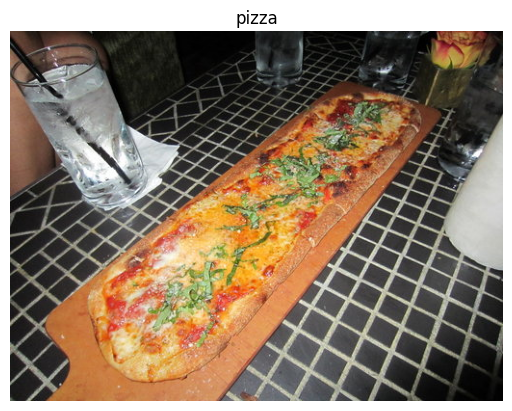

In [ ]:
# View a random image from training data set
img = view_random_image(target_dir ="pizza_steak/train/" , target_class = "pizza")

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
# Turning images into tensors
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 92,  66,  51],
        [ 93,  67,  52],
        [ 91,  65,  50],
        ...,
        [  9,   4,   1],
        [ 11,   6,   3],
        [ 17,  12,   9]],

       [[ 87,  61,  48],
        [ 90,  64,  51],
        [ 91,  65,  50],
        ...,
        [ 12,   8,   5],
        [ 14,   9,   6],
        [ 17,  12,   9]],

       [[ 83,  55,  43],
        [ 89,  61,  49],
        [ 94,  66,  54],
        ...,
        [ 12,   8,   5],
        [ 16,  11,   8],
        [ 19,  14,  11]],

       ...,

       [[100, 108,  97],
        [ 78,  86,  75],
        [ 49,  56,  48],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[102, 113,  99],
        [ 87,  98,  84],
        [ 65,  73,  62],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[ 90, 101,  87],
        [ 86,  97,  83],
        [ 77,  87,  76],
        ...,
        [  2,   2,   

In [ ]:
# View the image shape
img.shape # Returns width , height , colour channels

(384, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1 (divide them by maximum value(255))
img/225

array([[[0.40888889, 0.29333333, 0.22666667],
        [0.41333333, 0.29777778, 0.23111111],
        [0.40444444, 0.28888889, 0.22222222],
        ...,
        [0.04      , 0.01777778, 0.00444444],
        [0.04888889, 0.02666667, 0.01333333],
        [0.07555556, 0.05333333, 0.04      ]],

       [[0.38666667, 0.27111111, 0.21333333],
        [0.4       , 0.28444444, 0.22666667],
        [0.40444444, 0.28888889, 0.22222222],
        ...,
        [0.05333333, 0.03555556, 0.02222222],
        [0.06222222, 0.04      , 0.02666667],
        [0.07555556, 0.05333333, 0.04      ]],

       [[0.36888889, 0.24444444, 0.19111111],
        [0.39555556, 0.27111111, 0.21777778],
        [0.41777778, 0.29333333, 0.24      ],
        ...,
        [0.05333333, 0.03555556, 0.02222222],
        [0.07111111, 0.04888889, 0.03555556],
        [0.08444444, 0.06222222, 0.04888889]],

       ...,

       [[0.44444444, 0.48      , 0.43111111],
        [0.34666667, 0.38222222, 0.33333333],
        [0.21777778, 0

## An End-to-End Convolutional Nueral Network

Building a Convolutional Nueral Network to find patterns in our images , more specifically we need to:
* Load Our Images
* Preprocess our images
* Build a CNN
* Compile the model
* Fit the model with data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed
tf.random.set_seed(42)

# Preprocess data (get all of pixel values between 0 and 1 known as scaling / normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup path to data directories
train_dir = "/content/pizza_steak/train"

test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size = (224, 224),
                                               class_mode ="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir ,
                                               batch_size = 32 ,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               seed=42)
# Build a CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10 ,
                           kernel_size =3,
                           activation = "relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10 , 3 , activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10 , 3, activation="relu"),
    tf.keras.layers.Conv2D(10 , 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

# Compile our model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fitting our model
history = model.fit(train_data , epochs = 5 , steps_per_epoch=len(train_data), validation_data=valid_data , validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 159ms/step - loss: 0.5998 - accuracy: 0.6820 - val_loss: 0.4747 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 0.4600 - accuracy: 0.7847 - val_loss: 0.3634 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4136 - accuracy: 0.8200 - val_loss: 0.3672 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 7s 151ms/step - loss: 0.3642 - accuracy: 0.8440 - val_loss: 0.3609 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3374 - accuracy: 0.8607 - val_loss: 0.3092 - val_accuracy: 0.8880


**Note:** Use GPU if the above cell is taking longer to execute change the runtime type to do so

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Using a normal nueral network instead of convolutional nueral network


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224 , 224 , 3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1 , activation ="sigmoid")
])
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history_1 = model_1.fit(train_data , epochs = 5 , steps_per_epoch =len(train_data), validation_data = valid_data , validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 120ms/step - loss: 1.2274 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification: Breaking down

1. Become one with data
2. Preprocess the data (scaling or normalizing)
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model


### Become one with image

['1598345.jpg']
Image Shape:(343, 512, 3)
['1981348.jpg']
Image Shape:(512, 383, 3)


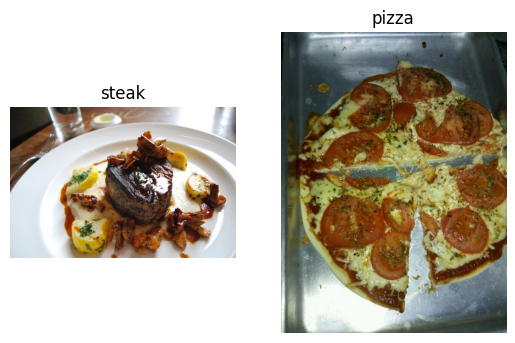

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1 , 2 , 1)
steak_img = view_random_image("pizza_steak/train/"  , "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/"  , "pizza")

### Preproces the data (prepare it for a model)


In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir  = "pizza_steak/test/"

Our Next step is to turn our data into **batches**

A batch is a small subset of data . Rather than look at all ~10,000 images at one time , a model might look at only 32 at a time.

This is due to:
1. 10,000 images(or more) might not fit into the memory of processor(GPU)

2. Trying to learn patterns in 10000 images in one hit , could result in the model not being able to do well

In [ ]:
# Create train and set data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# Load in our image data from directories

train_data=train_datagen.flow_from_directory(directory = train_dir , # Target directory of images
                                             target_size = (224 , 224) , # Target Size (height, width)
                                             class_mode = "binary" , #Type of data
                                             batch_size = 32) # Size of mini-batches to load data


test_data = test_datagen.flow_from_directory(directory = test_dir ,
                                             target_size =(224 , 224) ,
                                             class_mode = "binary" ,
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get our sample of train data batch
images , labels = train_data.next() # Get the "next" batch of images / labels in train data
len(images) , len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32 # Images by Batch Size

46.875

In [ ]:
# Get the first 2 images
images[:2] , images[0].shape

(array([[[[0.14509805, 0.07058824, 0.05490196],
          [0.16078432, 0.08627451, 0.07058824],
          [0.16078432, 0.09019608, 0.07450981],
          ...,
          [0.7607844 , 0.6431373 , 0.40000004],
          [0.75294125, 0.6313726 , 0.3803922 ],
          [0.7725491 , 0.6392157 , 0.38823533]],
 
         [[0.16470589, 0.09411766, 0.07843138],
          [0.15686275, 0.08627451, 0.07058824],
          [0.13333334, 0.07450981, 0.05490196],
          ...,
          [0.78823537, 0.6784314 , 0.43137258],
          [0.72156864, 0.6       , 0.34901962],
          [0.7254902 , 0.6039216 , 0.34901962]],
 
         [[0.13725491, 0.07843138, 0.06666667],
          [0.14901961, 0.09019608, 0.07843138],
          [0.1254902 , 0.07058824, 0.05882353],
          ...,
          [0.75294125, 0.6431373 , 0.39607847],
          [0.7372549 , 0.61960787, 0.36862746],
          [0.69411767, 0.57254905, 0.31764707]],
 
         ...,
 
         [[0.04313726, 0.01960784, 0.01960784],
          [0.03529

In [ ]:
images[7]

array([[[0.3019608 , 0.29803923, 0.43137258],
        [0.28235295, 0.27450982, 0.41960788],
        [0.38823533, 0.3803922 , 0.53333336],
        ...,
        [0.01960784, 0.02745098, 0.07450981],
        [0.02745098, 0.03529412, 0.08235294],
        [0.02352941, 0.03137255, 0.07843138]],

       [[0.43921572, 0.45882356, 0.53333336],
        [0.42352945, 0.4431373 , 0.5294118 ],
        [0.2509804 , 0.27450982, 0.37647063],
        ...,
        [0.02352941, 0.03137255, 0.07843138],
        [0.02745098, 0.03529412, 0.08235294],
        [0.02352941, 0.03137255, 0.07843138]],

       [[0.9490197 , 0.98823535, 0.9921569 ],
        [0.94117653, 0.97647065, 0.9960785 ],
        [0.8705883 , 0.909804  , 0.9568628 ],
        ...,
        [0.02745098, 0.03529412, 0.08235294],
        [0.02352941, 0.03137255, 0.07843138],
        [0.02352941, 0.03137255, 0.07843138]],

       ...,

       [[0.01176471, 0.01176471, 0.00392157],
        [0.00784314, 0.00784314, 0.        ],
        [0.00784314, 0

In [ ]:
# View the first batch values
labels

array([0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (Baseline Parameters)

A baseline is relatively a simple model or existing result that you setup when beginning a machine learning experiment , you try to beat the baseline

**Note:** In deep Learning , there is almost infinite amount of architecture you could create , its best to start with simple ones

In [ ]:
# Make the creation of model a little easier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPool2D , Activation
from tensorflow.keras import Sequential

In [ ]:
# Create a model
model_2 = Sequential([
    Conv2D( filters = 10 , # No of Sliding window over images (higher = more complex model)
            kernel_size = 3 , # Size of the filters
            strides = 1, # No of pixel the window moves at a time
            padding = "valid", # If "same" output shape is same as the input shape , if "valid" the output shape gets compressed
            activation="relu",
            input_shape =(224, 224 , 3)),
    Conv2D(10 , 3 , activation ="relu"),
    Conv2D(10 , 3 , activation ="relu"),
    Flatten(),
    Dense(1 , activation="sigmoid")
])

In [ ]:
# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics=["accuracy"])

### 4.Fit the model

In [ ]:
# Check the lengths of training and test data
len(train_data) , len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data ,
                        epochs = 5 ,
                        steps_per_epoch = len(train_data) ,
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 166ms/step - loss: 0.9748 - accuracy: 0.5867 - val_loss: 0.5948 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.4676 - accuracy: 0.7833 - val_loss: 0.4055 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3219 - accuracy: 0.8767 - val_loss: 0.3642 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 7s 149ms/step - loss: 0.2366 - accuracy: 0.9060 - val_loss: 0.5366 - val_accuracy: 0.7440
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 0.1364 - accuracy: 0.9587 - val_loss: 0.4744 - val_accuracy: 0.7880


### 5.Evaluating the model


<Axes: >

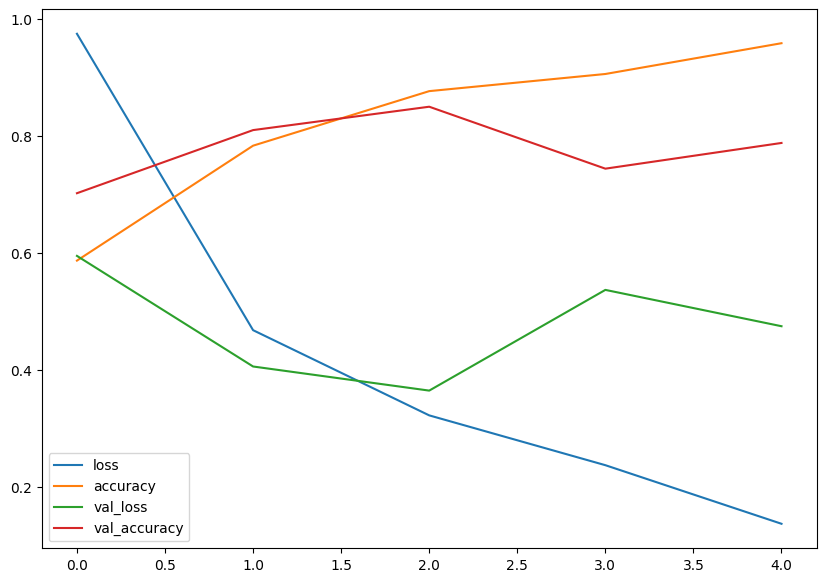

In [ ]:
# Plotting the training curves
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10 , 7))

In [ ]:
# Plot the validation and training curves separately

def plot_loss_curve(history):
  """
  Return separate loss curves for training and validation metrics
  """
  import matplotlib.pyplot as plt
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  # Plot Loss
  plt.plot(epochs, loss , label ="Training Loss")
  plt.plot(epochs , val_loss , label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy , label ="Training accuracy")
  plt.plot(epochs , val_accuracy , label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


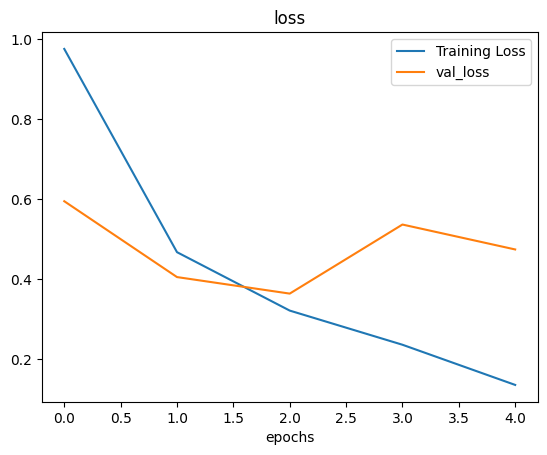

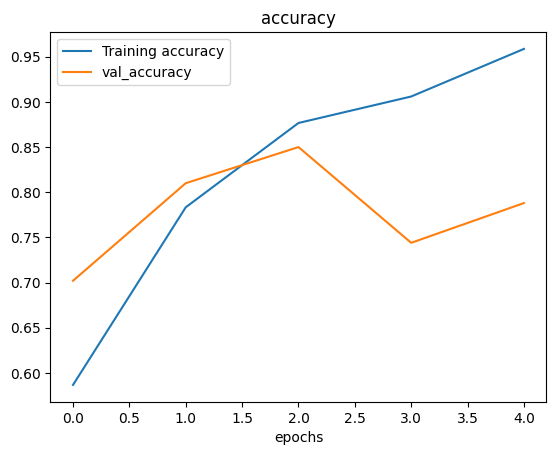

In [ ]:
plot_loss_curve(history_2)

**Note:** when a model's **validation loss starts to increase** its likely that the model is **overfitting** , it's learning the patterns in the training dataset too well and thus the model's ability to generalize the unseen data will be diminished

### 6. Adjust the model's parameters

Fitting a machine learning model comes in 3 steps
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv layers
* Add another dense layer to output the flattened layer

Reduce Overfitting:
* Add Data Augumentation
* Add Regularization layers such as MaxPool2D
* Add more data

In [ ]:
# Create a model
model_3 = Sequential([
    Conv2D(10 , 3 , activation ="relu" , input_shape=(224 , 224 , 3) ),
    MaxPool2D(pool_size = 2),
    Conv2D(10 , 3 , activation ="relu" ),
    MaxPool2D(),
    Conv2D(10 , 3 , activation ="relu" ),
    MaxPool2D(),
    Flatten(),
    Dense(1 , activation="sigmoid")
])

In [ ]:
# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics ="accuracy")


In [ ]:
# Fit the model
history_3 = model_3.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) , validation_data = test_data , validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 143ms/step - loss: 0.6295 - accuracy: 0.6360 - val_loss: 0.5387 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4877 - accuracy: 0.7767 - val_loss: 0.3837 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4064 - accuracy: 0.8187 - val_loss: 0.3542 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3855 - accuracy: 0.8380 - val_loss: 0.3364 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4036 - accuracy: 0.8280 - val_loss: 0.3430 - val_accuracy: 0.8500


In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 10)       

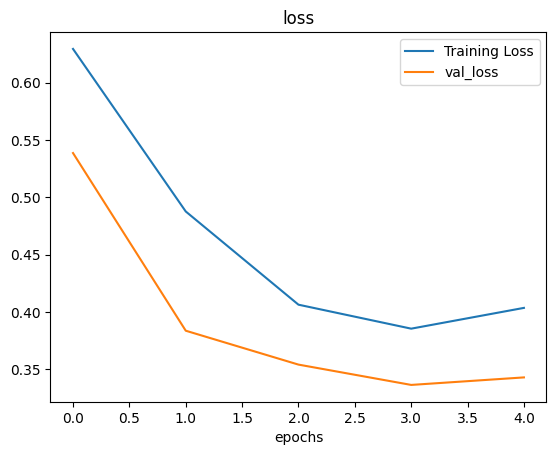

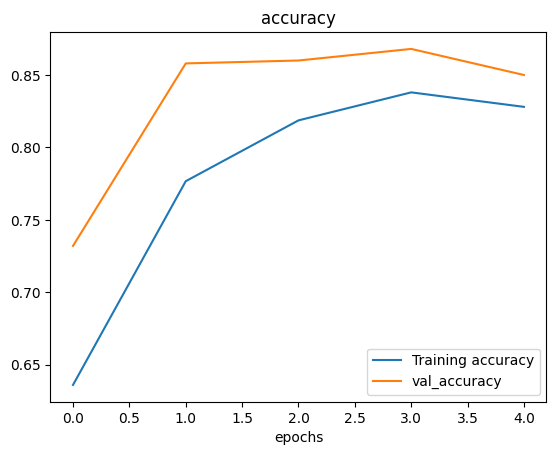

In [ ]:
plot_loss_curve(history_3)

### Data Augumentation

In [ ]:
# Create ImageDataGenerator training instance with data augementation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_augumented = ImageDataGenerator(rescale = 1/255. ,
                                              rotation_range =0.2, # Rotate an image
                                              shear_range=0.2, # Shear an Image
                                              zoom_range= 0.2,
                                              width_shift_range =0.2,
                                              height_shift_range=0.3,
                                              horizontal_flip =True)

# Create ImageDataGenerator without data augementation
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

**Question:** What is Data Augumentation ?

Data Augumentation is process of altering our training data , leading it have more diversity and in turn allowing our models to learn more generalizable patterns. Alterning means adjusting the rotation of an image, flipping it , cropping it

In [ ]:
# Import data and augument it from training directory

print("Augumented Data")
train_data_augumented = train_datagen_augumented.flow_from_directory(train_dir,
                                                                     target_size=(224,224),
                                                                     batch_size =32,
                                                                     class_mode="binary",
                                                                     shuffle=False) # Only for demonstration
print("Non Augumented  Training Data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size =32,
                                               class_mode="binary",
                                               shuffle=False) # Only for demonstration
print("Non Augumented Testing Data")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size =32,
                                               class_mode="binary",
                                               shuffle=False) # Only for demonstration

Augumented Data
Found 7500 images belonging to 10 classes.
Non Augumented  Training Data
Found 7500 images belonging to 10 classes.
Non Augumented Testing Data
Found 2500 images belonging to 10 classes.


**Note:** Data Augumentation is used only in training data , using `ImageDataGenerator()`

Lets visualize augumented data

In [ ]:
# Get sample data
images , labels = train_data.next()
augumented_images , augumented_labels = train_data_augumented.next()

In [ ]:
import matplotlib.pyplot as plt


Showing image number:10


(-0.5, 223.5, 223.5, -0.5)

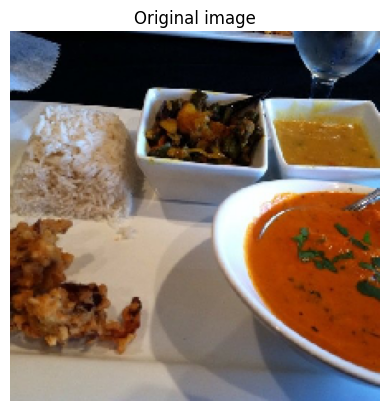

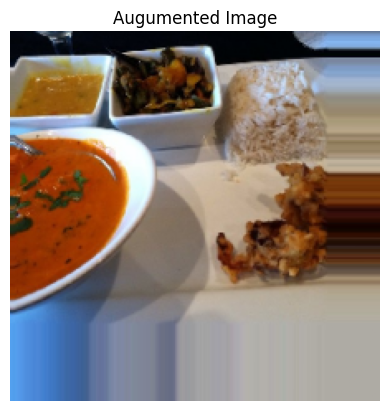

In [ ]:
# Show original image and augumented image
import random
random_number = random.randint(0 ,32)
print(f"Showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augumented_images[random_number])
plt.title(f"Augumented Image")
plt.axis(False)

In [ ]:
# Build a model that learns on augumented data

model_4 = Sequential([
    Conv2D( 10 , 3 , activation="relu" ),
    MaxPool2D(pool_size=2),
    Conv2D(10 , 3 , activation="relu"),
    MaxPool2D(),
    Conv2D(10 , 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1 ,activation="sigmoid")
])

# Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fitting the model
history_4 = model_4.fit(train_data_augumented ,
            epochs = 5 ,
            steps_per_epoch = len(train_data_augumented) ,
            validation_data =test_data ,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 498ms/step - loss: 0.7139 - accuracy: 0.4233 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6936 - accuracy: 0.4700 - val_loss: 0.6925 - val_accuracy: 0.5940
Epoch 3/5
47/47 [==============================] - 23s 500ms/step - loss: 0.6931 - accuracy: 0.5107 - val_loss: 0.6920 - val_accuracy: 0.6080
Epoch 4/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6898 - accuracy: 0.5673 - val_loss: 0.6719 - val_accuracy: 0.6760
Epoch 5/5
47/47 [==============================] - 23s 498ms/step - loss: 0.6974 - accuracy: 0.4947 - val_loss: 0.6913 - val_accuracy: 0.5840


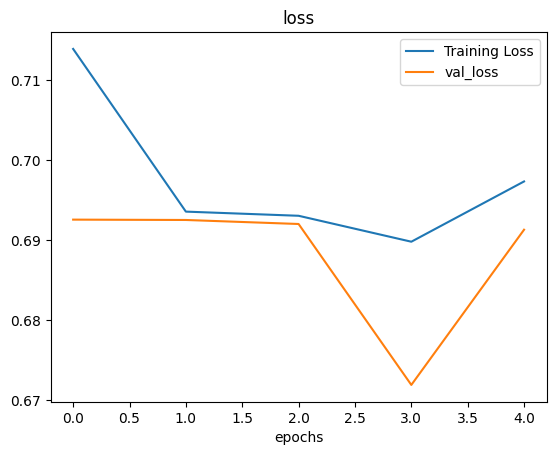

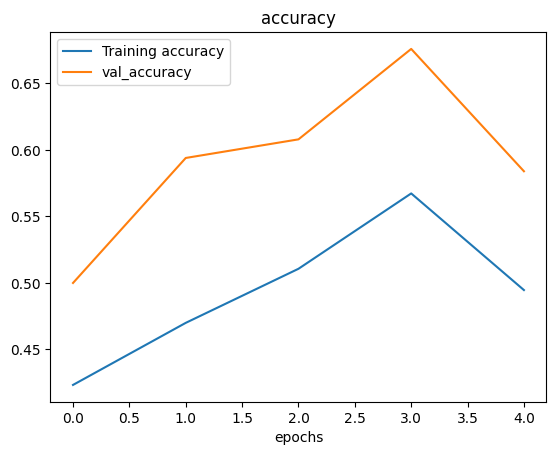

In [ ]:
plot_loss_curve(history_4)

### Shuffling our augumented training data

In [ ]:
train_data_augumented_shuffled = train_datagen_augumented.flow_from_directory(train_dir,
                                                                              target_size=(224,224),
                                                                              shuffle=True,
                                                                              class_mode="binary",
                                                                              batch_size=32)


NameError: ignored

In [ ]:
# Create a model
model_5 = Sequential([
    Conv2D(10 , 3 , activation="relu"),
    MaxPool2D(pool_size = 3),
    Conv2D(10, 3 , activation="relu"),
    MaxPool2D(),
    Conv2D(10 , 3 , activation ="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1 , activation="sigmoid")
])

#Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fiting the model
history_5 = model_5.fit(train_data_augumented_shuffled ,
            epochs = 5 ,
            steps_per_epoch =len(train_data_augumented_shuffled) ,
            validation_data = test_data ,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 440ms/step - loss: 0.6704 - accuracy: 0.5720 - val_loss: 0.6095 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 24s 512ms/step - loss: 0.6223 - accuracy: 0.6493 - val_loss: 0.5158 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 21s 442ms/step - loss: 0.5436 - accuracy: 0.7200 - val_loss: 0.3722 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4790 - accuracy: 0.7793 - val_loss: 0.3389 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4575 - accuracy: 0.7873 - val_loss: 0.3138 - val_accuracy: 0.8760


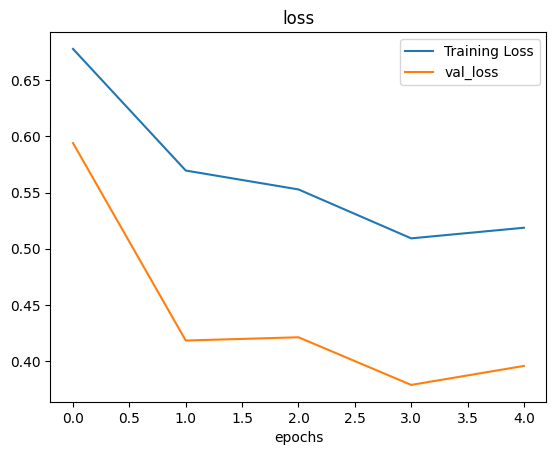

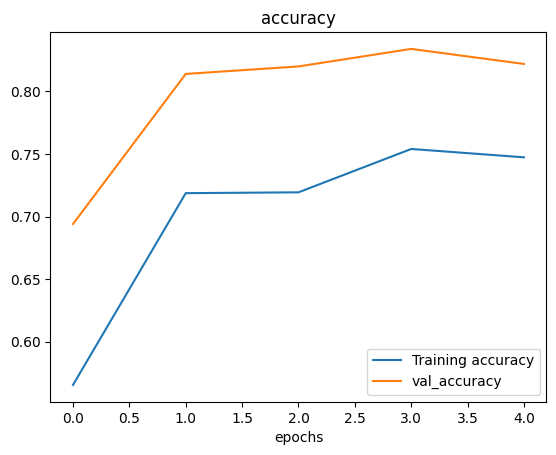

In [ ]:
#Plot loss curves
plot_loss_curve(history_5)

**Note:** While Shuffling the data our model gets exposed various images and learn patterns thereby increasing the accuracy

## Making a prediction with our trained model on our custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-11-30 06:54:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2023-11-30 06:54:55 (219 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



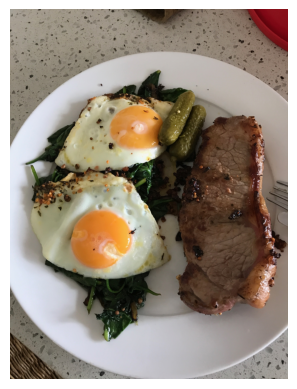

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak =mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of image
steak.shape

(4032, 3024, 3)

In [ ]:
steak/255.

array([[[0.63529412, 0.61960784, 0.58431373],
        [0.63921569, 0.62352941, 0.58823529],
        [0.65098039, 0.63529412, 0.6       ],
        ...,
        [0.53333333, 0.06666667, 0.09019608],
        [0.54901961, 0.08235294, 0.10588235],
        [0.54901961, 0.08235294, 0.10588235]],

       [[0.64313725, 0.62745098, 0.59215686],
        [0.64313725, 0.62745098, 0.59215686],
        [0.64313725, 0.62745098, 0.59215686],
        ...,
        [0.52156863, 0.05490196, 0.07843137],
        [0.5254902 , 0.05882353, 0.08235294],
        [0.5372549 , 0.07058824, 0.09411765]],

       [[0.65098039, 0.63529412, 0.6       ],
        [0.64705882, 0.63137255, 0.59607843],
        [0.63921569, 0.62352941, 0.58823529],
        ...,
        [0.53333333, 0.06666667, 0.09019608],
        [0.5254902 , 0.05882353, 0.08235294],
        [0.53333333, 0.06666667, 0.09019608]],

       ...,

       [[0.60392157, 0.51764706, 0.43529412],
        [0.55686275, 0.4745098 , 0.39215686],
        [0.39607843, 0

> When Training a nueral network and you want to make a prediction with it on your custom data , make sure the new data is preprocessed in the same format as the old data

In [ ]:
# Helper function to preprocess the image

def load_and_prep(filename , img_shape = 224):
  """
  Reads an image from filename , turns it into a tensor and reshapes it
  to (img_shape , img_shape , color_channels)
  """
  # Read the image
  img = tf.io.read_file(filename)
  # Decode the read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img , size = [img_shape , img_shape])
  #Rescale the image , values between 0 and 1
  img =img/255.
  return img


In [ ]:
# Laoding in and preprocess our custom image
steak_image = load_and_prep("03-steak.jpeg")
steak_image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_5.predict(tf.expand_dims(steak_image , axis = 0))

1/1 [==============================] - 0s 21ms/step


Looks like the custom image is being put through our model , however , it currently outputs a prediction probability , we should visualize the prediction

In [ ]:
# Class Names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probabilty and indexing it to the class name

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_n_plot(model , filename , class_name = class_names):
  """
  Imports an image located at filename , makes a prediction with model
  and plots the image with predicted class as the title.
  """

  #Import the target image and preprocess it
  img = load_and_prep(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


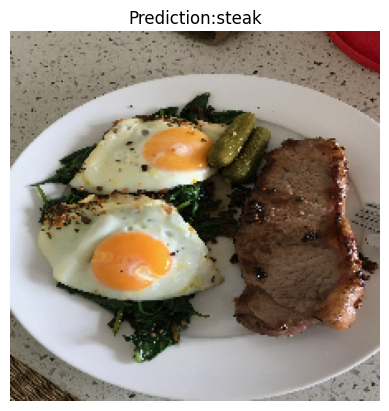

In [ ]:
# Test our model on a custom image
pred_n_plot(model_5 , "03-steak.jpeg")

In [ ]:
# Download another test custom image and make a prediction on it

! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_n_plot(model_5 , "03-pizza-dad.jpeg")

--2023-11-30 06:55:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-11-30 06:55:13 (246 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



NameError: ignored

# Multi-Class Image Classification


Steps:
1. Become one with data
2. Preprocess the data(get the data ready for model)
3. Create a model (start with baseline)
4. Fit the model  (overfit it to make sure it works)
5. Evaluate the model
6. Adjust Different Hyperparameters and improve the model (try to beat the baseline model/reduce overfitting)


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip" , "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-30 08:16:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  24.0MB/s    in 22s     

2023-11-30 08:17:12 (22.9 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath , dirnames , filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [ ]:
# Setup the train and test directories

train_dir ="10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names =np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['915818.jpg']
Image Shape:(512, 512, 3)


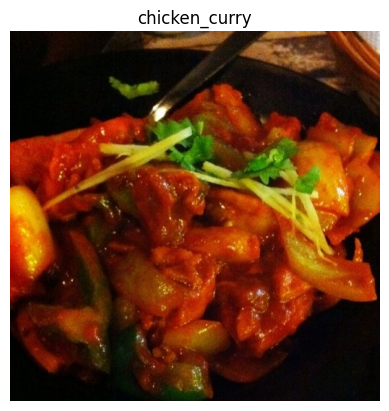

In [ ]:
# Visualize the data
import random
img = view_random_image(target_dir= train_dir,
                        target_class=random.choice(class_names))

### 2.Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the image
train_datagen = ImageDataGenerator(rescale =1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode ="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (Baseline model)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten ,Dense

In [ ]:
# Create a model
model_6 = Sequential([
    Conv2D(10 , 3 , activation = "relu" , input_shape=(224,224,3)),
    Conv2D(10 , 3 , activation="relu"),
    MaxPool2D(),
    Conv2D(10 , 3 , activation="relu"),
    Conv2D(10 , 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10 , activation="softmax")
])

# Compile the model
model_6.compile(loss ="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_6 = model_6.fit(train_data ,
                        epochs = 5 ,
                        steps_per_epoch=len(train_data) ,
                        validation_data = test_data ,
                        validation_steps =len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 121ms/step - loss: 2.1783 - accuracy: 0.1869 - val_loss: 2.0914 - val_accuracy: 0.2200
Epoch 2/5
235/235 [==============================] - 29s 124ms/step - loss: 1.8996 - accuracy: 0.3311 - val_loss: 1.9591 - val_accuracy: 0.3096
Epoch 3/5
235/235 [==============================] - 29s 123ms/step - loss: 1.4630 - accuracy: 0.5049 - val_loss: 2.0595 - val_accuracy: 0.3040
Epoch 4/5
235/235 [==============================] - 28s 118ms/step - loss: 0.8721 - accuracy: 0.7145 - val_loss: 2.7372 - val_accuracy: 0.2724
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 0.3768 - accuracy: 0.8829 - val_loss: 3.7927 - val_accuracy: 0.2644


### 5. Evaluate the model


In [ ]:
# Evaluate the test data
model_6.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 3.6589 - accuracy: 0.2820


[3.658872365951538, 0.28200000524520874]

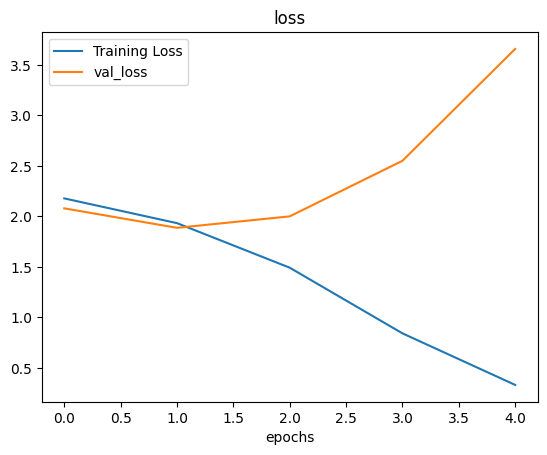

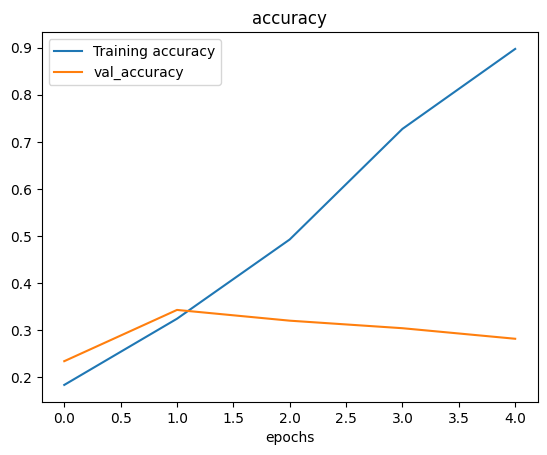

In [ ]:
# Check the model's loss curve
plot_loss_curve(history = history_6)

These loss curves tells us that the model is **overfitting** , great result in training data and performs poor in testing data

###  Adjust the model hyperparameters (to beat baseline/overfitting data)

Due to its performance on training data , it's clear that the model is learning something ....

However ,it's not generalizing well to unseen data (overfitting)

* Get more data - having more data gives a model more opportunity to learn diverse patterns
* Simplify the model - one way to simplify is to reduce the number of hidden units in layers
* Use Data Augumentation - data augementation manipulates the training data in such a way to add more diversity to it.
* Use transfer learning

#### Simplify the model
remove 2 convolutional layers

In [ ]:
model_6.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
model_7 = Sequential([
    Conv2D(10 , 3 , activation="relu" ,input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10 , 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10 , activation="softmax")
])

model_7.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_7 = model_7.fit(train_data ,
                      epochs = 5 ,
                      steps_per_epoch = len(train_data) ,
                      validation_data = test_data ,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 28s 114ms/step - loss: 2.1389 - accuracy: 0.2259 - val_loss: 2.0594 - val_accuracy: 0.2716
Epoch 2/5
235/235 [==============================] - 30s 129ms/step - loss: 1.8306 - accuracy: 0.3787 - val_loss: 1.9599 - val_accuracy: 0.3108
Epoch 3/5
235/235 [==============================] - 30s 126ms/step - loss: 1.4498 - accuracy: 0.5125 - val_loss: 2.1082 - val_accuracy: 0.2792
Epoch 4/5
235/235 [==============================] - 27s 115ms/step - loss: 0.9741 - accuracy: 0.6928 - val_loss: 2.4126 - val_accuracy: 0.2704
Epoch 5/5
235/235 [==============================] - 27s 115ms/step - loss: 0.5527 - accuracy: 0.8365 - val_loss: 2.8705 - val_accuracy: 0.2696


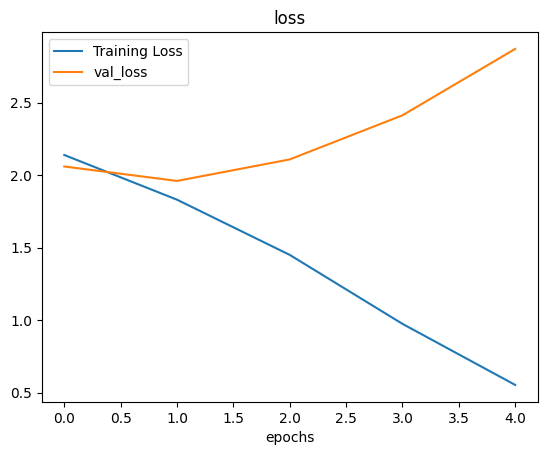

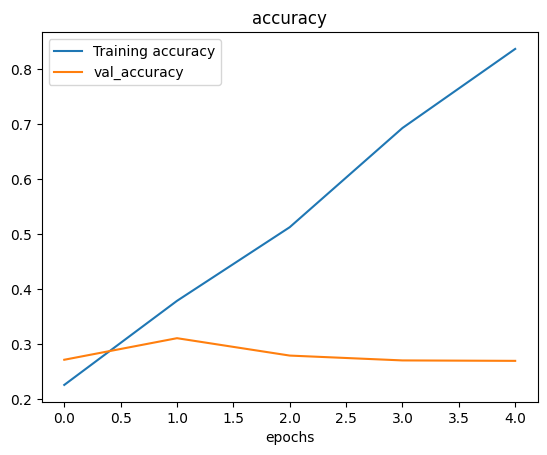

In [ ]:
plot_loss_curve(history_7)

#### Data Augumentation
Simplifying the model didn't work , therby using data augumentation

Ideally , we want to:
* Reduce Overfitting
* Improve Validation Accuracy


In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_6)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


In [ ]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))



Epoch 1/5
235/235 [==============================] - 107s 446ms/step - loss: 2.1925 - accuracy: 0.1897 - val_loss: 1.9631 - val_accuracy: 0.3012
Epoch 2/5
235/235 [==============================] - 107s 454ms/step - loss: 2.0439 - accuracy: 0.2767 - val_loss: 1.8884 - val_accuracy: 0.3396
Epoch 3/5
235/235 [==============================] - 106s 448ms/step - loss: 1.9840 - accuracy: 0.3040 - val_loss: 1.8240 - val_accuracy: 0.3668
Epoch 4/5
235/235 [==============================] - 108s 459ms/step - loss: 1.9444 - accuracy: 0.3265 - val_loss: 1.7893 - val_accuracy: 0.3844
Epoch 5/5
235/235 [==============================] - 104s 443ms/step - loss: 1.9080 - accuracy: 0.3387 - val_loss: 1.7741 - val_accuracy: 0.4028


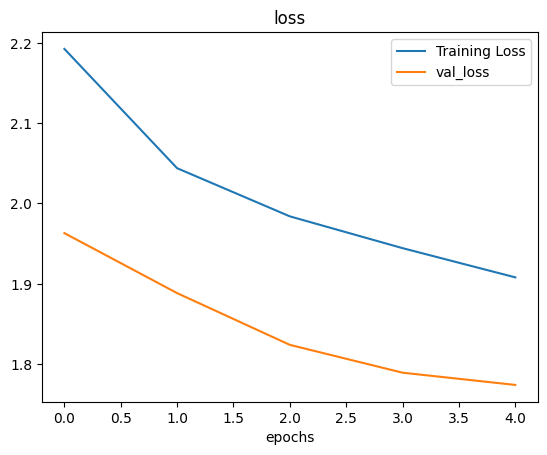

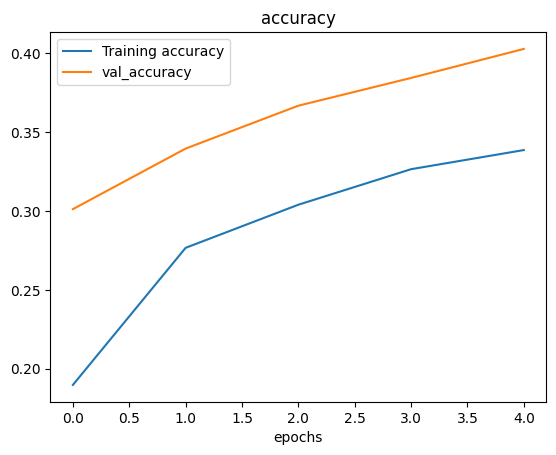

In [ ]:
plot_loss_curve(history_10)

In [ ]:
# Download the images
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2023-11-30 08:34:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.01s   

2023-11-30 08:34:02 (164 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2023-11-30 08:34:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 

In [ ]:
# Reconfig pred_n_plot function

def pred_n_plot(model , filename , class_name = class_names):
  """
  Imports an image located at filename , makes a prediction with model
  and plots the image with predicted class as the title.
  """

  #Import the target image and preprocess it
  img = load_and_prep(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Add logic for multiclass classification
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]


  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


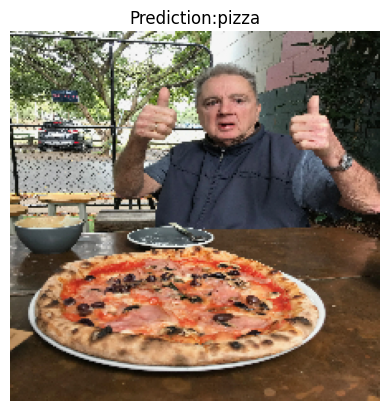

In [ ]:
pred_n_plot(model = model_10 , filename ="03-pizza-dad.jpeg" , class_name = class_names)

1/1 [==============================] - 0s 21ms/step


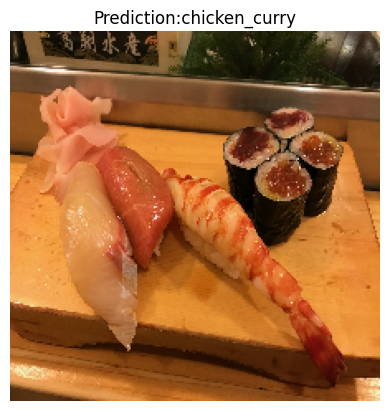

In [ ]:
pred_n_plot(model = model_10 , filename ="03-sushi.jpeg" , class_name = class_names)

# Saving and Loading model

In [ ]:
# Save a model
model_10.save("saved_model_10")

In [ ]:
# Load a trained model
loaded_model_10 = tf.keras.models.load_model("saved_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 8s 97ms/step - loss: 1.7741 - accuracy: 0.4028


[1.774072289466858, 0.4027999937534332]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 91ms/step - loss: 1.7741 - accuracy: 0.4028


[1.774072289466858, 0.4027999937534332]